In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('C:/Users/Ijaz10/Desktop/CSV/housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
y = df[['median_house_value']]
X = df.drop('median_house_value', axis = 1)

In [6]:
cat_data = X[['ocean_proximity']]
num_data = X.drop('ocean_proximity', axis = 1)

In [7]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y,test_size = 0.2, random_state = 42)

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [9]:
rooms_ix, bedrooms_ix, population_ix, hld_ix = 3, 4, 5, 6

class Attrib_adder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bdrooms = True):
        self.add_bdrooms = add_bdrooms
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        rooms_per_hld = X[:, rooms_ix] / X[:, hld_ix]
        pln_per_hld = X[:, population_ix] / X[:, hld_ix]
        if self.add_bdrooms:
            bdr_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_hld, pln_per_hld, bdr_per_room]
        else:
            return np.c_[X, rooms_per_hld, pln_per_hld]

In [10]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attrib_adder', Attrib_adder(add_bdrooms = False)),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('Encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_data.columns),
    ('cat', cat_pipeline, cat_data.columns)
])

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0, solver = 'cholesky')
model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', ridge)
])
model.fit(train_x, train_y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [12]:
pred = model.predict(test_x)

In [14]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_y, pred)
rmse = np.sqrt(mse)
print(rmse)

69808.19274721808


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

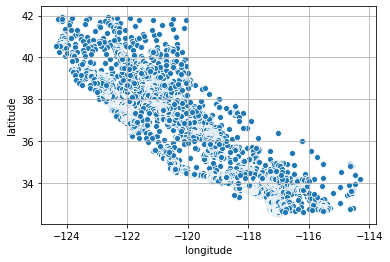

In [16]:
sns.scatterplot(x = 'longitude', y = 'latitude', data = df)
plt.grid()
plt.show()

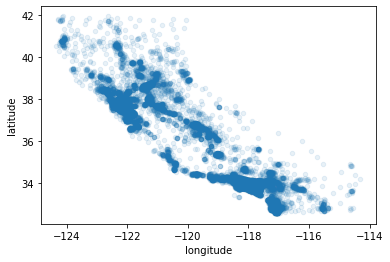

In [17]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)
plt.show()

In [18]:
 X.head(1
       )

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY


In [19]:
model.predict(pd.DataFrame([[-120.23, 38.88, 35, 500, 89, 200, 100, 6.7, 'NEAR BAY']], columns = X.columns))


array([[255744.]])

In [ ]:


y[(y['median_house_value'] >= 250000) & (y['median_house_value'] <= 300000)]

In [ ]:
X.loc[5]

In [ ]:
model.predict(pd.DataFrame([[-120.23, 38.88, 35, 500, 89, 200, 100, 6.7, 'NEAR BAY']], columns = X.columns))

In [ ]:
model.predict(pd.DataFrame([[-122.25, 37.85, 52, 919, 213, 413, 193, 4.0368, 'NEAR BAY']], columns = X.columns))

In [ ]:
X.loc[6]

In [ ]:
model.predict(pd.DataFrame([[-122.25, 37.84, 52, 2535, 489, 1094, 514, 3.6591, 'NEAR BAY']], columns = X.columns))

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(my_model_loaded, X, y, 
                        scoring = 'neg_mean_squared_error', cv = 10)
rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(l_scores):
    print('SCORES : ', l_scores)
    print('MEAN : ', l_scores.mean())
    print('STD DEVIATION : ', l_scores.std())